# Data Analysis Mathematics, Algorithms and Modeling

## Team Information - **Group Presentation 6**

**Team Members**

Name: Ayush Patel  
Student Number: 9033358

Name: Nikhil Shankar  
Student Number: 9026254

Name: Sreehari Prathap  
Student Number: 8903199


## Step 1: Install and Configure the IDE (e.g., Jupyter Notebook and VS Code)
- Install Anaconda (for Jupyter Notebook) and Visual Studio Code (VS Code).
  - Anaconda: Visit [anaconda.com](https://www.anaconda.com/products/individual) and download the appropriate installer for your operating system.
  - VS Code: Download and install from [Visual Studio Code](https://code.visualstudio.com/).
- Install Pandas Library
  - Open the terminal and run the following command: `pip install pandas`

## Step 2: Downloading the Dataset
We are using the Utrecht Fairness Recruitment dataset from [Kaggle], which can be downloaded directly via the link:
- URL: [https://www.kaggle.com/datasets/ictinstitute/utrecht-fairness-recruitment-dataset]

## Step 3 : Data Cleansing

### Data Cleansing Process for User Data (Talent Acquisition) from a CSV File

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

file = "../data/recruitment_dataset.csv"
df_unfiltered = pd.read_csv(file)
row_count = len(df_unfiltered)

print("Total number of datapoints(rows)", row_count)

Total number of datapoints(rows) 4000


#### **Hypotheses**

Our aim of this presentation is to dig into datasets and figure out if any gender based bias play key role in hiring decisions.
Our hypotheses is that gender is not a deciding factor in hiring rather other features.

##### Removing empty valued rows from the dataset
By giving axis as 0 we filter rows with any empty values. 

In [2]:
df = df_unfiltered.dropna(axis=0, how='any')
print("Total number of datapoints(rows)", len(df))

Total number of datapoints(rows) 4000


We understand that there are no rows with empty values. The dataset is now filtered for analysis so we can proceed to the next step. 

In [3]:
def plot_scatter_diagram(df, dependent_column_name):
    fig, axes = plt.subplots(4, int((len(df.columns)/4) + 1),figsize=(15,15))
    for i, col_name in enumerate(df.columns):
        print(i)
        if col_name != dependent_column_name:
            sns.scatterplot(x=col_name, y=dependent_column_name, data=df, ax=axes[i%4, i//4])
    plt.tight_layout()
    plt.show()

def  plot_histogram_2(self):
        fig,axes = plt.subplots(4, int(len(self.df.columns)//4)+1, figsize=(15,15))
        for i, col_name in enumerate(self.df.columns):
            axes[i%4, i//4].hist(self.df[col_name], bins=100)
            axes[i%4, i//4].set_xlabel(col_name)
            axes[i%4, i//4].set_ylabel('Frequency')
        plt.tight_layout()
        plt.show()

def plot_histogram(df, logscale=True):
    numeric_columns = df.select_dtypes(include=['number']).columns.tolist()
    print(numeric_columns)
    fig,axes = plt.subplots(1, 3, figsize=(15,5))
    for i, col_name in enumerate(numeric_columns):
        if(logscale):
            axes[i%3].set_yscale('log')
        axes[i%3].hist(df[col_name], bins=100)
        axes[i%3].set_xlabel(col_name)
        axes[i%3].set_ylabel('Frequency')
    plt.tight_layout()
    plt.show()

def min_max_scale(df):
    scaled_df = df.copy()
    # Apply Min-Max scaling to numeric columns
    for column in scaled_df.select_dtypes(include='number').columns:
        min_val = scaled_df[column].min()
        max_val = scaled_df[column].max()

        # Scale the column
        scaled_df[column] = (scaled_df[column] - min_val) / (max_val - min_val)
    return scaled_df

#### **Scatter Plot**

['age', 'ind-university_grade', 'ind-languages']


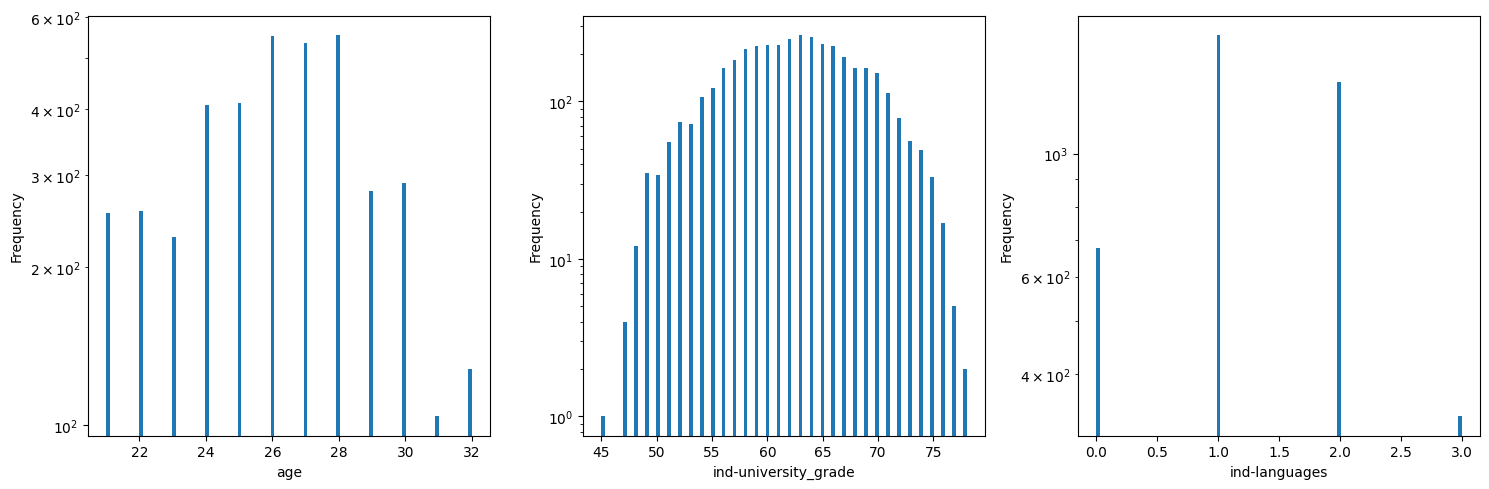

In [4]:
# We are using seaborn to plot scatter plots
import seaborn as sns
plot_histogram(df_unfiltered)

#### **Converting Categorical to numerical**

In [5]:
def map_categorical_values(df, mappings):
    for col, mapping in mappings.items():
        if col in df.columns:
            df[col] = df[col].map(mapping)
    return df

mappings = {
    'gender': {'male': 1, 'female': 0},
    'education': {'high_school': 1, 'bachelor': 2, 'master': 3, 'phd': 4},
    'department': {'HR': 1, 'IT': 2, 'Finance': 3, 'Marketing': 4},
    'nationality':{'German': 1, 'Dutch': 2, 'Belgian': 3},
    'sport': {
    'Swimming': 1,
    'Golf': 2,
    'Running': 3,
    'Cricket': 4,
    'Chess': 5,
    'Tennis': 6,
    'Football': 7,
    'Rugby': 8
},
'ind-debateclub': {False:0, True:1},
'ind-programming_exp': {False:0, True:1},
'ind-international_exp': {False:0, True:1},
'ind-entrepeneur_exp' : {False:0, True:1},
'ind-exact_study': {False:0, True:1},
'ind-degree': {'phd': 1, 'bachelor': 2, 'master': 3},
'company': {'A':1, 'B':2, 'C':3, 'D':4},
'decision':  {False:0, True:1}
}

# Apply the mappings to the DataFrame
df_mapped = map_categorical_values(df_unfiltered, mappings)
# Check the mapped DataFrame
display(df_mapped.head())

,Id,gender,age,nationality,sport,ind-university_grade,ind-debateclub,ind-programming_exp,ind-international_exp,ind-entrepeneur_exp,ind-languages,ind-exact_study,ind-degree,company,decision
0,x8011e,0.0,24,1,1,70,0,0,0,0,1,1,1,1,1
1,x6077a,1.0,26,1,2,67,0,1,0,0,2,1,2,1,0
2,x6006e,0.0,23,2,3,67,0,1,1,0,0,1,3,1,0
3,x2173b,1.0,24,2,4,70,0,1,0,0,1,1,3,1,1
4,x6241a,0.0,26,1,2,59,0,0,0,0,1,0,3,1,1


In [6]:
df_mapped.drop('Id', axis=1, inplace=True)


#### **Logistic Regression**

We will train and evaluate the confusion matrix on 5 different splits.
- Entire dataset
- Company A
- Company B
- Company C
- Company D

We will try to analyse the weight assigned to gender in the two logistic regression.

In [7]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score


def perform_logistic_regression(df):
    # Split the dataset into training (90%) and test (10%) sets
    X = df.drop(columns=['decision'])  # Drop the 'decision' column from the features
    y = df['decision']  # Hiring decision is the target
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)
    
    # Train the logistic regression model
    model = LogisticRegression()
    model.fit(X_train, y_train)
    
    # Extract coefficients for all features
    coefficients = model.coef_[0]
    coef_df = pd.DataFrame({
        'Feature': X.columns,
        'Weight (Coefficient)': coefficients
    })
    
    # Predict using the test set
    y_pred = model.predict(X_test)
    
    # Calculate accuracy and precision on the test set
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    
    # Print Accuracy and Precision
    print(f"Accuracy (on test set): {accuracy:.2f}")
    print(f"Precision (on test set): {precision:.2f}")
    
    # Display the DataFrame with feature coefficients
    display(coef_df)



In [8]:
df_lr_companyA = (df_mapped[df_mapped['company'] == 1]).copy()
df_lr_companyB = (df_mapped[df_mapped['company'] == 2]).copy()
df_lr_companyC = (df_mapped[df_mapped['company'] == 3]).copy()
df_lr_companyD = (df_mapped[df_mapped['company'] == 4]).copy()

df_lr_scaled = min_max_scale(df_mapped)
df_lr_scaled = df_lr_scaled.dropna()

#### **For whole dataset** 

In [9]:
perform_logistic_regression(df_lr_scaled)

Accuracy (on test set): 0.74
Precision (on test set): 0.65


,Feature,Weight (Coefficient)
0,gender,0.035593
1,age,0.474984
2,nationality,-0.031758
3,sport,0.015350
4,ind-university_grade,4.185768
5,ind-debateclub,-0.170305
6,ind-programming_exp,-0.312967
7,ind-international_exp,0.684877
8,ind-entrepeneur_exp,-0.232895
9,ind-languages,3.294249


#### **For Company A**

In [10]:
df_lr_companyA.drop('company', axis=1, inplace=True)
df_lr_A = df_lr_companyA.dropna()
df_lr_A = min_max_scale(df_lr_A)
perform_logistic_regression(df_lr_A)

Accuracy (on test set): 0.68
Precision (on test set): 0.71


,Feature,Weight (Coefficient)
0,gender,-0.158962
1,age,0.525362
2,nationality,-0.020425
3,sport,-0.154481
4,ind-university_grade,4.819335
5,ind-debateclub,-0.213868
6,ind-programming_exp,-0.908984
7,ind-international_exp,0.355265
8,ind-entrepeneur_exp,-0.545846
9,ind-languages,3.844819


#### **For Company B**

In [11]:
df_lr_companyB.drop('company', axis=1, inplace=True)
df_lr_B = df_lr_companyB.dropna()
df_lr_B = min_max_scale(df_lr_B)
perform_logistic_regression(df_lr_B)

Accuracy (on test set): 0.92
Precision (on test set): 0.81


,Feature,Weight (Coefficient)
0,gender,0.540847
1,age,-0.290792
2,nationality,-0.202319
3,sport,0.836558
4,ind-university_grade,1.096423
5,ind-debateclub,1.283208
6,ind-programming_exp,-0.204040
7,ind-international_exp,-0.024299
8,ind-entrepeneur_exp,0.724317
9,ind-languages,5.691622


#### **For Company C**

In [12]:
df_lr_companyC.drop('company', axis=1, inplace=True)
df_lr_C = df_lr_companyC.dropna()
df_lr_C = min_max_scale(df_lr_C)
perform_logistic_regression(df_lr_C)

Accuracy (on test set): 0.80
Precision (on test set): 0.86


,Feature,Weight (Coefficient)
0,gender,-0.077761
1,age,0.923295
2,nationality,-0.583419
3,sport,-0.206450
4,ind-university_grade,1.378691
5,ind-debateclub,-0.466488
6,ind-programming_exp,-0.504344
7,ind-international_exp,2.032596
8,ind-entrepeneur_exp,-0.531218
9,ind-languages,2.580957


#### **For Company D**

In [13]:
df_lr_companyD.drop('company', axis=1, inplace=True)
df_lr_D = df_lr_companyD.dropna()
df_lr_D = min_max_scale(df_lr_D)
perform_logistic_regression(df_lr_D)

Accuracy (on test set): 0.78
Precision (on test set): 0.78


,Feature,Weight (Coefficient)
0,gender,-0.212329
1,age,0.819559
2,nationality,0.562307
3,sport,-0.082798
4,ind-university_grade,7.610081
5,ind-debateclub,-0.889474
6,ind-programming_exp,0.414407
7,ind-international_exp,0.467434
8,ind-entrepeneur_exp,-0.603339
9,ind-languages,2.678132


#### **Summary of Logistic Regression**

In [29]:
data = {
    'Company': ['Whole Dataset', 'Company A', 'Company B', 'Company C', 'Company D'],
    'Accuracy': [0.74, 0.68, 0.92, 0.80, 0.78],
    'Precision': [0.65, 0.71, 0.81, 0.86, 0.78],
    'Weight (Coefficient) for Gender': [0.035593, -0.158962, 0.540847, -0.077761, -0.212329]
}

# Create the DataFrame
summary_df = pd.DataFrame(data)

# Display the summary DataFrame
print(summary_df)

         Company  Accuracy  Precision  Weight (Coefficient) for Gender
0  Whole Dataset      0.74       0.65                         0.035593
1      Company A      0.68       0.71                        -0.158962
2      Company B      0.92       0.81                         0.540847
3      Company C      0.80       0.86                        -0.077761
4      Company D      0.78       0.78                        -0.212329


- We created a 5 logistic regression models based on companies
- We can see that the model is predicting with average accuracies.
- Now in the whole dataset we can see that the weight/coefficient for Gender is close to zero meaning gender is not a great predictor in the hiring decision. And thi we can confirm with an accuracy of 75%.
- For Company B it shows high value of coefficient ie 0.5 and we can see that the accuracy is also more than 90%. We can deduce that there is a gender bias towards the male with a confidence of 92%
- Company C shows almost no bias.
- The remaining company A shows slight bias to the female gender and this we can say with only 68% confidence.

#### **Pearsons Correlation**

In [14]:
def plot_pearsons_correlation(df):
    correlation_matrix = df.corr()
    # Plot the heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
    # Add title and labels
    plt.title("Pearson's Correlation Heatmap", fontsize=16)
    plt.show()

##### **Whole Dataset**

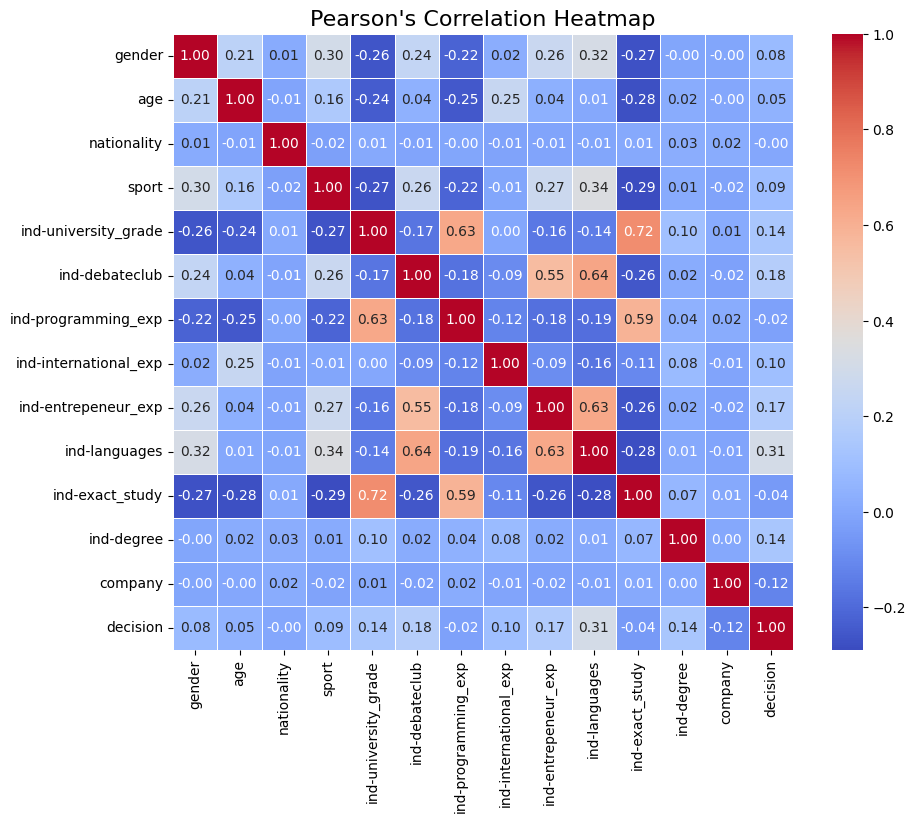

In [15]:
plot_pearsons_correlation(df_mapped)

#### **Split on Company**

In [16]:
df_companyA = df_mapped[df_mapped['company'] == 1]
df_companyB = df_mapped[df_mapped['company'] == 2]
df_companyC = df_mapped[df_mapped['company'] == 3]
df_companyD = df_mapped[df_mapped['company'] == 4]

##### **Pearson Correlation for Company A**

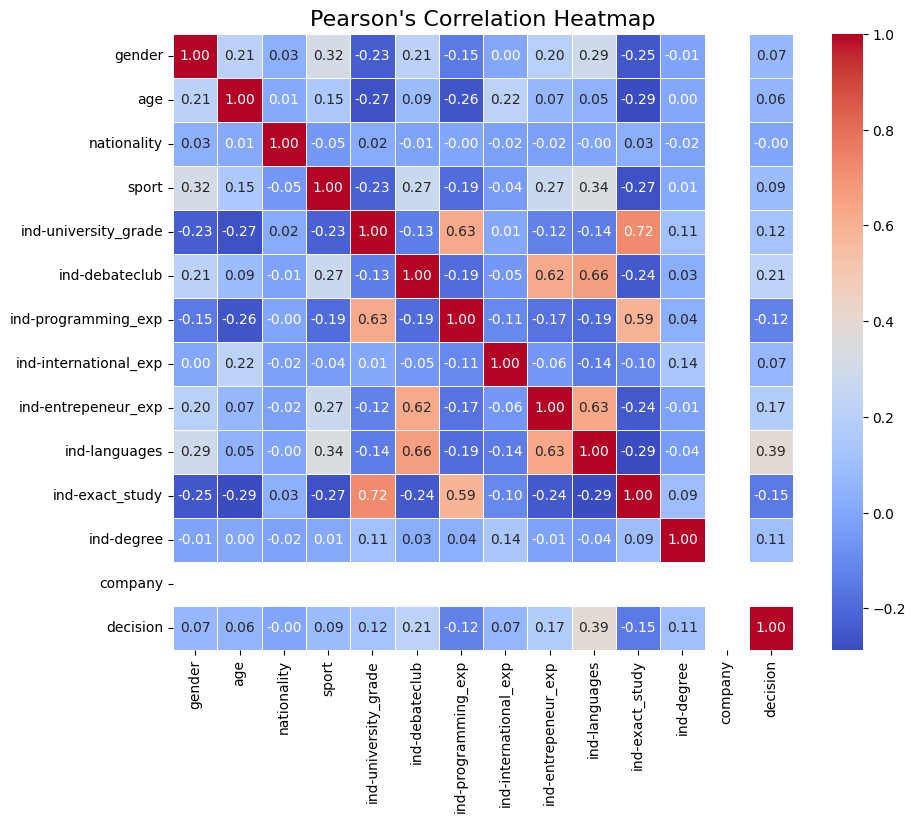

In [17]:
plot_pearsons_correlation(df_companyA)

##### **Pearson Correlation for Company B**

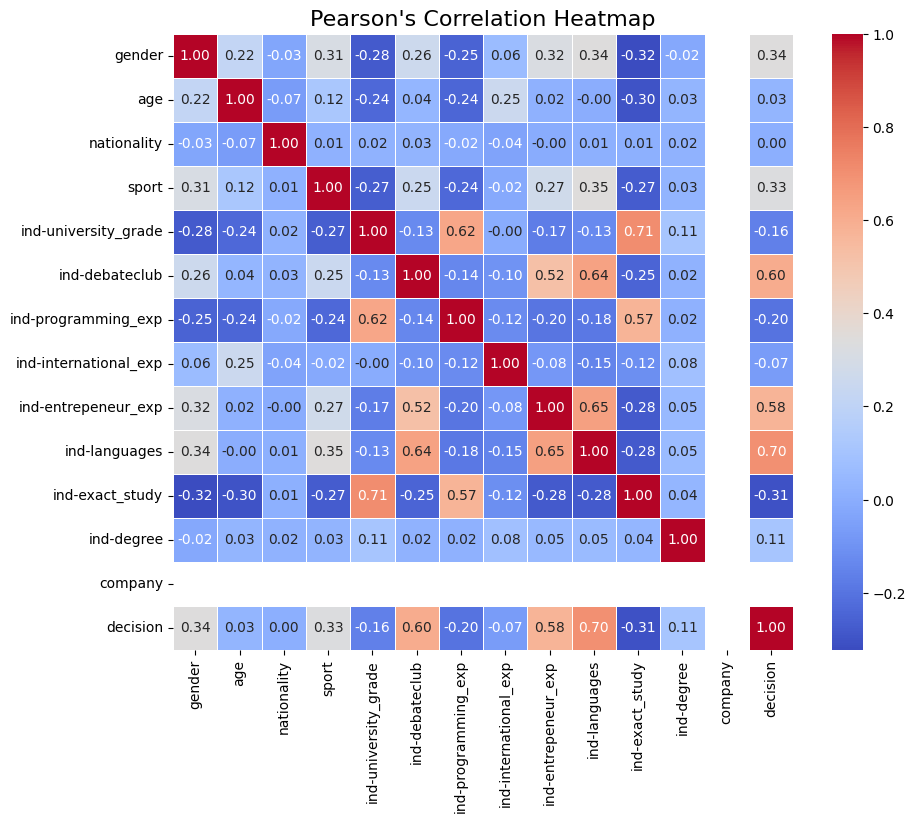

In [18]:
plot_pearsons_correlation(df_companyB)

##### **Pearson Correlation for Company C**

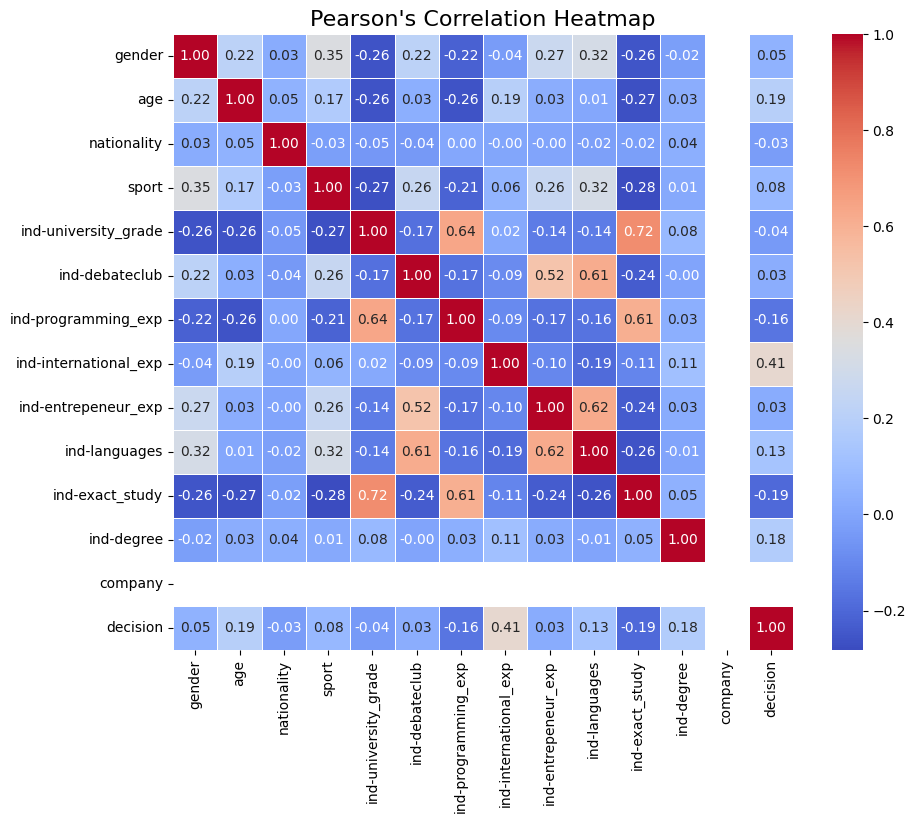

In [19]:
plot_pearsons_correlation(df_companyC)

##### **Pearson Correlation for Company D**

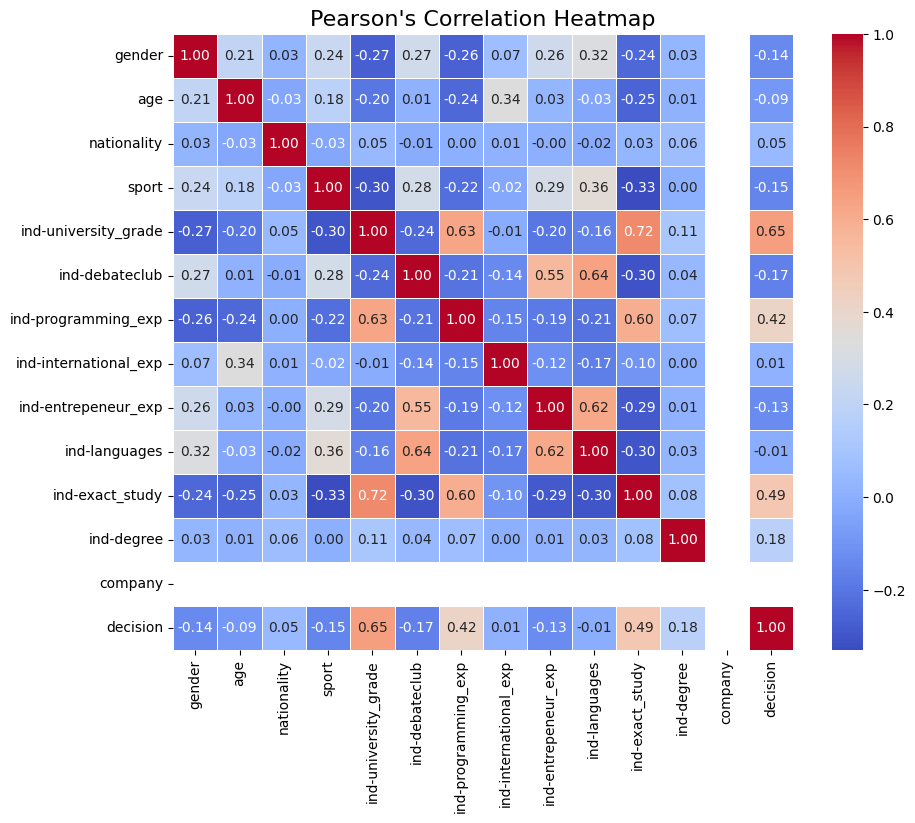

In [20]:
plot_pearsons_correlation(df_companyD)

#### **Important Finding**

In [21]:
data = {
    'Company': ['Company A', 'Company B', 'Company C', 'Company D'],
    'Correlation (Gender & Hiring)': [0.07, 0.34, 0.05, 0.14]
}

# Create DataFrame
correlation_df = pd.DataFrame(data)
display(correlation_df)

,Company,Correlation (Gender & Hiring)
0,Company A,0.07
1,Company B,0.34
2,Company C,0.05
3,Company D,0.14


We can see that there is high correlation for gender and hiring in Company B alone while other companies show negligible bias and whole dataset also shows the same.

#### **Probabilistic Reasoning**

In [22]:
import pandas as pd

def probabilistic_reasoning(df):
    # Prior Probabilities
    total_males = len(df[df['gender'] == 1])
    total_females = len(df[df['gender'] == 0])
    
    male_hires = len(df[(df['gender'] == 1) & (df['decision'] == 1)])
    female_hires = len(df[(df['gender'] == 0) & (df['decision'] == 1)])

    # Calculate prior probabilities
    P_male = total_males / len(df)
    P_female = total_females / len(df)
    P_hiring = len(df[df['decision'] == 1]) / len(df)

    # Conditional Probabilities
    P_hiring_given_male = male_hires / total_males if total_males > 0 else 0
    P_hiring_given_female = female_hires / total_females if total_females > 0 else 0

    # Display results
    print(f"Prior probability of Male: {P_male:.2f}")
    print(f"Prior probability of Female: {P_female:.2f}")
    print(f"Prior probability of Hiring: {P_hiring:.2f}")
    print(f"Conditional probability of Hiring given Male: {P_hiring_given_male:.2f}")
    print(f"Conditional probability of Hiring given Female: {P_hiring_given_female:.2f}")


#### **Conditional Probability Entire Dataset**

In [23]:
# Call the function to calculate the probabilities
probabilistic_reasoning(df_mapped)

Prior probability of Male: 0.53
Prior probability of Female: 0.45
Prior probability of Hiring: 0.32
Conditional probability of Hiring given Male: 0.35
Conditional probability of Hiring given Female: 0.27


#### **Conditional Probability Company A**

In [24]:
probabilistic_reasoning(df_companyA)

Prior probability of Male: 0.54
Prior probability of Female: 0.44
Prior probability of Hiring: 0.42
Conditional probability of Hiring given Male: 0.46
Conditional probability of Hiring given Female: 0.39


#### **Conditional Probability Company B**

In [25]:
probabilistic_reasoning(df_companyB)

Prior probability of Male: 0.53
Prior probability of Female: 0.45
Prior probability of Hiring: 0.31
Conditional probability of Hiring given Male: 0.45
Conditional probability of Hiring given Female: 0.14


#### **Conditional Probability Company C**

In [26]:
probabilistic_reasoning(df_companyC)

Prior probability of Male: 0.52
Prior probability of Female: 0.45
Prior probability of Hiring: 0.26
Conditional probability of Hiring given Male: 0.28
Conditional probability of Hiring given Female: 0.23


#### **Conditional Probability Company D**

In [27]:
probabilistic_reasoning(df_companyD)

Prior probability of Male: 0.53
Prior probability of Female: 0.44
Prior probability of Hiring: 0.28
Conditional probability of Hiring given Male: 0.22
Conditional probability of Hiring given Female: 0.34


#### **Summary of Probabilistic Reasoning**

In [28]:
data = {
    'Company': ['Entire Dataset', 'Company A', 'Company B', 'Company C', 'Company D'],
    'PriorProb of Male': [0.53, 0.54, 0.53, 0.52, 0.53],
    'PriorProb of Female': [0.45, 0.44, 0.45, 0.45, 0.44],
    'PriorProb of Hiring': [0.32, 0.42, 0.31, 0.26, 0.28],
    'ConditionalProb Hiring given Male': [0.35, 0.46, 0.45, 0.28, 0.22],
    'ConditionalProb Hiring given Female': [0.27, 0.39, 0.14, 0.23, 0.34]
}

# Create DataFrame
probabilistic_reasoning_df = pd.DataFrame(data)

# Display the DataFrame
display(probabilistic_reasoning_df)

,Company,PriorProb of Male,PriorProb of Female,PriorProb of Hiring,ConditionalProb Hiring given Male,ConditionalProb Hiring given Female
0,Entire Dataset,0.53,0.45,0.32,0.35,0.27
1,Company A,0.54,0.44,0.42,0.46,0.39
2,Company B,0.53,0.45,0.31,0.45,0.14
3,Company C,0.52,0.45,0.26,0.28,0.23
4,Company D,0.53,0.44,0.28,0.22,0.34


#### **Important Findings**

- There is a slight difference of distribution for male and female distribution. Male count of total applicants is higher in all splits of the dataset.
- Company A shows a very slight bias towards the Male applicants. The total hiring rate was 0.42 but for male its 46% and female its 39%
- Company B shows huge bias in favour of Males. The hiring rate is 31% but for males it is 45% and females it is 14% which is a stark difference of 30%.
- We can deduce that Company B could be in an industry needing male presence more
- Company C similar to Company A doesnt show major bias but it still favors the male population more than female population.
- Company D unlike other 3 favors female applicants more. The hiring rate is 28% but for females it is 34% and males it is 22%. 
- We can deduce that Company D could be in an industry requiring more presence of female employees.